<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,48.688195,-0.004145,58.684050,58.684722,-0.000672
1,0.0,1.0,91.679574,-0.000835,101.678739,101.682381,-0.003642
2,0.0,2.0,33.098516,-0.006284,43.092232,43.092765,-0.000533
3,0.0,3.0,25.289550,-0.024680,35.264871,35.282659,-0.017788
4,0.0,4.0,59.034475,-0.000976,69.033499,69.032513,0.000986
...,...,...,...,...,...,...,...
29995,999.0,25.0,56.922741,-0.003288,66.919453,66.922787,-0.003334
29996,999.0,26.0,99.270924,-0.002900,109.268025,109.270223,-0.002198
29997,999.0,27.0,88.164074,-0.001786,98.162288,98.163568,-0.001280
29998,999.0,28.0,99.797046,0.000597,109.797643,109.796335,0.001309


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,48.688195,-0.004145,58.684050,58.684722,-0.000672
1,0.0,1.0,91.679574,-0.000835,101.678739,101.682381,-0.003642
2,0.0,2.0,33.098516,-0.006284,43.092232,43.092765,-0.000533
3,0.0,3.0,25.289550,-0.024680,35.264871,35.282659,-0.017788
4,0.0,4.0,59.034475,-0.000976,69.033499,69.032513,0.000986
...,...,...,...,...,...,...,...
29995,999.0,25.0,56.922741,-0.003288,66.919453,66.922787,-0.003334
29996,999.0,26.0,99.270924,-0.002900,109.268025,109.270223,-0.002198
29997,999.0,27.0,88.164074,-0.001786,98.162288,98.163568,-0.001280
29998,999.0,28.0,99.797046,0.000597,109.797643,109.796335,0.001309


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    48.688195 -0.004145   58.684050   58.684722 -0.000672
      1.0    91.679574 -0.000835  101.678739  101.682381 -0.003642
      2.0    33.098516 -0.006284   43.092232   43.092765 -0.000533
      3.0    25.289550 -0.024680   35.264871   35.282659 -0.017788
      4.0    59.034475 -0.000976   69.033499   69.032513  0.000986
...                ...       ...         ...         ...       ...
999.0 25.0   56.922741 -0.003288   66.919453   66.922787 -0.003334
      26.0   99.270924 -0.002900  109.268025  109.270223 -0.002198
      27.0   88.164074 -0.001786   98.162288   98.163568 -0.001280
      28.0   99.797046  0.000597  109.797643  109.796335  0.001309
      29.0   47.124663 -0.004600   57.120064   57.124883 -0.004819

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    48.688195 -0.004145   58.684050   58.684722 -0.000672
      1.0    91.679574 -0.000835  101.678739  101.682381 -0.003642
      2.0    33.098516 -0.006284   43.092232   43.092765 -0.000533
      3.0    25.289550 -0.024680   35.264871   35.282659 -0.017788
      4.0    59.034475 -0.000976   69.033499   69.032513  0.000986
...                ...       ...         ...         ...       ...
999.0 25.0   56.922741 -0.003288   66.919453   66.922787 -0.003334
      26.0   99.270924 -0.002900  109.268025  109.270223 -0.002198
      27.0   88.164074 -0.001786   98.162288   98.163568 -0.001280
      28.0   99.797046  0.000597  109.797643  109.796335  0.001309
      29.0   47.124663 -0.004600   57.120064   57.124883 -0.004819

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,48.688195,-0.004145,58.684050,58.684722,-0.000672
1,0.0,1.0,91.679574,-0.000835,101.678739,101.682381,-0.003642
2,0.0,2.0,33.098516,-0.006284,43.092232,43.092765,-0.000533
3,0.0,3.0,25.289550,-0.024680,35.264871,35.282659,-0.017788
4,0.0,4.0,59.034475,-0.000976,69.033499,69.032513,0.000986
...,...,...,...,...,...,...,...
29995,999.0,25.0,56.922741,-0.003288,66.919453,66.922787,-0.003334
29996,999.0,26.0,99.270924,-0.002900,109.268025,109.270223,-0.002198
29997,999.0,27.0,88.164074,-0.001786,98.162288,98.163568,-0.001280
29998,999.0,28.0,99.797046,0.000597,109.797643,109.796335,0.001309


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    48.688195 -0.004145   58.684050   58.684722 -0.000672
      1.0    91.679574 -0.000835  101.678739  101.682381 -0.003642
      2.0    33.098516 -0.006284   43.092232   43.092765 -0.000533
      3.0    25.289550 -0.024680   35.264871   35.282659 -0.017788
      4.0    59.034475 -0.000976   69.033499   69.032513  0.000986
...                ...       ...         ...         ...       ...
999.0 25.0   56.922741 -0.003288   66.919453   66.922787 -0.003334
      26.0   99.270924 -0.002900  109.268025  109.270223 -0.002198
      27.0   88.164074 -0.001786   98.162288   98.163568 -0.001280
      28.0   99.797046  0.000597  109.797643  109.796335  0.001309
      29.0   47.124663 -0.004600   57.120064   57.124883 -0.004819

[30000 rows x 5 columns]

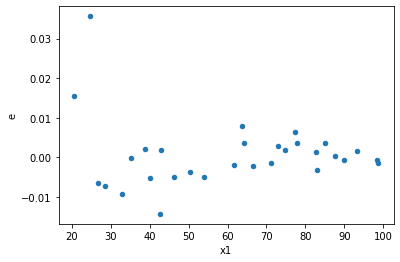

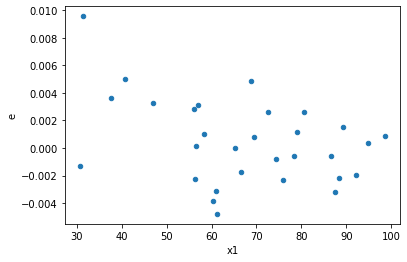

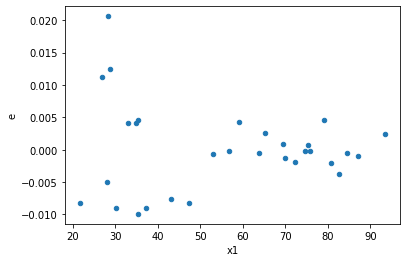

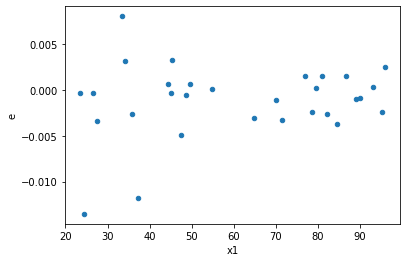

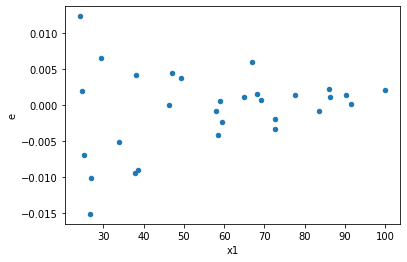

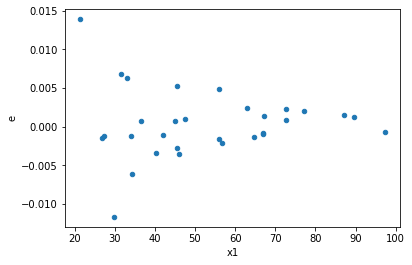

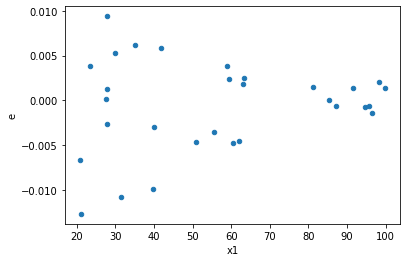

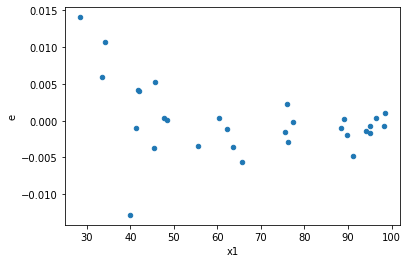

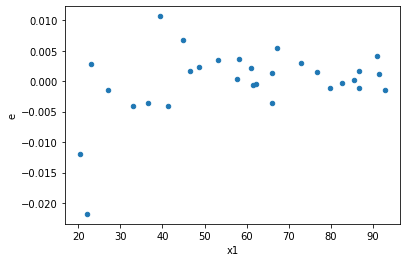

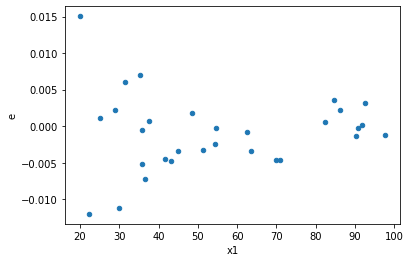

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
201.0,11.0,11.0,7.749138145888184e-05,8.962243387742684e-05,7.0446710417165305e-06,8.147493988856985e-06,1.1565471177589204,0.8136890781269135,0.5931554609365433,0.40684453906345674,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.0007394255730986256,2.5250636014973595e-05,6.72205066453296e-05,2.2955123649975997e-06,0.03414898934203569,3.02533344909283e-06,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,0.0006602344593186696,2.4772477578923375e-05,6.0021314483515415e-05,2.2520434162657614e-06,0.037520728022114126,4.926887817957867e-06,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,0.00103178982577034,4.851877280568366e-05,9.379907507003092e-05,4.410797527789424e-06,0.04702389148822947,1.5671867763008662e-05,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,0.0006071741941585121,3.939237954463311e-05,5.5197654014410195e-05,3.581125413148464e-06,0.06487821769043946,7.868978327527692e-05,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,0.00027237044978233076,1.638361301477173e-05,2.4760949980211886e-05,1.489419364979248e-06,0.06015194756944066,5.4090866897804435e-05,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,0.0009516740418088182,5.335880550928792e-05,8.651582198261984e-05,4.850800500844356e-06,0.0560683628691505,3.8081593829455596e-05,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,0.0012044881818342305,4.164134211583591e-05,0.00010949892562129368,3.7855765559850824e-06,0.03457181460462586,3.224926896488118e-06,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,0.0004404611665290083,6.601702866953393e-05,4.004192422990985e-05,6.001548060866721e-06,0.14988160974501283,0.0038783956212668194,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,0.00030271070646019935,4.518679382780694e-05,2.7519155132745397e-05,4.107890347982449e-06,0.1492738540906155,0.0038111305656718573,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    950
Reject005=1 : Homoscedasticity       50
Name: Result_test, dtype: int64